In [1]:
import numpy as np
import sys
import gsw
import xarray as xr
import numpy as np
from scipy import integrate
from copy import deepcopy 
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl
from xgcm import Grid 
import warnings
warnings.filterwarnings('ignore')

from jmd95 import densjmd95

In [2]:
sys.path.append('/Users/jakesteinberg/ECCOv4-py/ECCOv4-py')
import ecco_v4_py as ecco

In [3]:
## Set top-level file directory for the ECCO NetCDF files
## =================================================================
# base_dir = '/home/username/'
base_dir = '/Users/jakesteinberg/Documents/NASA_OSTST/ECCO/'
## define a high-level directory for ECCO fields
ECCO_dir = base_dir + '/v4'
## Load the model grid
grid_dir= ECCO_dir + '/nctiles_grid/'
# ecco_grid = ecco.load_ecco_grid_nc(grid_dir, 'ECCOv4r3_grid.nc', k_subset=[0])
ecco_grid = ecco.load_ecco_grid_nc(grid_dir, 'ECCO-GRID.nc')

In [4]:
## Load 2D Monthly data...SSH 
data_dir= ECCO_dir + '/nctiles_monthly'
ecco_daily_vars = ecco.recursive_load_ecco_var_from_years_nc(data_dir, \
                                           vars_to_load=['THETA','SALT','SSHDYN','OBPNOPAB'],\
                                           years_to_load=range(2011,2017)).load() # if desired, add after 'SSH','NEW_VAR',... 'SSH','OBP',                                           

## Merge the ecco_grid with the ecco_vars to make the ecco_ds
ecco_monthly_ds = xr.merge((ecco_grid , ecco_daily_vars))

loading files of  OBPNOPAB
loading files of  SALT
loading files of  SSHDYN
loading files of  THETA


In [5]:
ocean_mask = np.ceil(ecco_monthly_ds.hFacC[0])
ocean_mask = ocean_mask.where(ocean_mask==1, np.nan)

In [84]:
ecco_monthly_ds.OBPNOPAB

<xarray.DataArray 'OBPNOPAB' (time: 72, tile: 13, j: 90, i: 90)>
array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 1.52572317e+01,  9.89738369e+00,  1.05312614e+01, ...,
           5.85415039e+01,  5.68773842e+01,  5.63038635e+01],
         [ 1.71561470e+01,  1.44313450e+01,  1.61339512e+01, ...,
           5.87539253e+01,  5.74763069e+01,  5.63322601e+01],
         [ 1.81771278e+01,  1.92311649e+01,  1.96546822e+01, ...,
           5.90750351e+01,  5.85981598e+01,  5.71212997e+01]],

        [[ 1.92580833e+01,  2.21287823e+01,  2.21329136e+01, ...,
           5.90725021e+01,  5.88353043e+01,  5.75709267e+01],
         [ 2.02109585e+01,  2.09651241e+01,  2.21475410e+01, ...,
           5.71184769e+01,  5.73699036e+01,  5.69293289e+01],
         [ 1.98606968e+01,  1.72125282e+01,  7.44929695e+00, ...,
           5.43567085e+01,  5.43573799e+01,  5.33048973e+01],
...
           1.80244312e+01,  1.70010548e+01,  1.88146820e+01],
         [ 2.44593792e+01,  2.34253902e+01,  3.62648277e+01, ...,
           1.60223789e+01,  1.45120068e+01,  1.45058708e+01],
         [ 2.95928326e+01,  2.50327244e+01,  3.15364780e+01, ...,
           1.93364410e+01,  1.64563847e+01,  1.63110905e+01]],

        [[ 2.88323841e+01,  2.70745468e+01,  2.81458359e+01, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 2.99217911e+01,  2.86046467e+01,  2.93356609e+01, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 2.98791904e+01,  2.95167427e+01,  3.10712299e+01, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 2.05869026e+01,  2.04072876e+01,  1.87438946e+01, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 1.49887447e+01,  1.72235012e+01,  1.83538609e+01, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 1.65705395e+01,  1.71186638e+01,  1.72096615e+01, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]]],
      dtype=float32)
Coordinates:
  * j         (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * i         (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * tile      (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC        (tile, j, i) float32 -111.6 -111.3 -110.9 ... -99.42 -105.6 -111.9
    YC        (tile, j, i) float32 -88.24 -88.38 -88.52 ... -88.03 -88.08 -88.1
    CS        (tile, j, i) float32 0.06158 0.06675 0.07293 ... -0.9854 -0.9984
    SN        (tile, j, i) float32 -0.9981 -0.9978 -0.9973 ... -0.1705 -0.05718
    Depth     (tile, j, i) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    rA        (tile, j, i) float32 3.623e+08 3.633e+08 ... 3.685e+08 3.611e+08
    timestep  (time) int64 167292 167964 168708 169428 ... 217692 218412 219156
  * time      (time) datetime64[ns] 2011-01-16T12:00:00 ... 2016-12-16T12:00:00
Attributes:
    units:      m
    long_name:  OBP with Global Mean Air-Pressure Removed

In [7]:
np.shape(ecco_monthly_ds.SALT) # [month, depth, tile, lat,lon]

(72, 50, 13, 90, 90)

In [8]:
H = ecco_monthly_ds.Depth 
z_star = ((ecco_monthly_ds.Z - ecco_monthly_ds.SSHDYN)/(H + ecco_monthly_ds.SSHDYN))*H

-5906.237
4325.282
-4264.2505


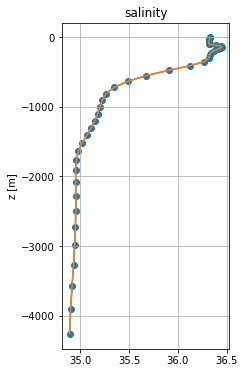

In [9]:
testloc = np.where((ecco_monthly_ds.YC > 33) & (ecco_monthly_ds.YC < 35) & (ecco_monthly_ds.XC > -45) & (ecco_monthly_ds.XC < -43))
test_salt = ecco_monthly_ds.SALT[0,:,testloc[0][0],testloc[1][0],testloc[2][0]]
test_salt = test_salt.where(test_salt>0, np.nan)
f, ax = plt.subplots(1,1,figsize=(3,6))
ax.plot(test_salt, z_star[:,0,testloc[0][0],testloc[1][0],testloc[2][0]])
ax.scatter(test_salt, z_star[:,0,testloc[0][0],testloc[1][0],testloc[2][0]])
ax.plot(test_salt, ecco_monthly_ds.Z)
ax.grid()
ax.set_title('salinity')
ax.set_ylabel('z [m]')

print(z_star[-1,0,testloc[0][0],testloc[1][0],testloc[2][0]].data)
print(H[testloc[0][0],testloc[1][0],testloc[2][0]].data)
print(z_star[np.where(np.isnan(test_salt))[0][0]-1,0,testloc[0][0],testloc[1][0],testloc[2][0]].data)

In [10]:
# density using ECCO equation of state(?) 
p = gsw.p_from_z(ecco_monthly_ds.Z, ecco_monthly_ds.YC)
z = gsw.z_from_p(p, ecco_monthly_ds.YC)
salt = ecco_monthly_ds.SALT[0:24]
salt = salt.where(salt>0, np.nan)
rho_jmd95 = densjmd95(salt,ecco_monthly_ds.THETA[0:24],p)

In [11]:
salt = ecco_monthly_ds.SALT[24:48]
salt = salt.where(salt>0, np.nan)
rho_jmd95_2 = densjmd95(salt,ecco_monthly_ds.THETA[24:48],p)

In [12]:
salt = ecco_monthly_ds.SALT[48:]
salt = salt.where(salt>0, np.nan)
rho_jmd95_3 = densjmd95(salt,ecco_monthly_ds.THETA[48:],p)

In [13]:
rho_jmd95 = np.concatenate((rho_jmd95,rho_jmd95_2,rho_jmd95_3),axis=0)

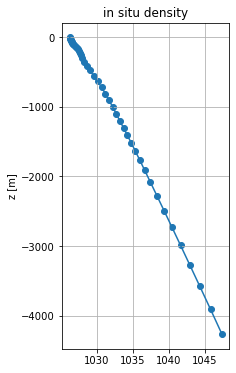

In [14]:
testloc = np.where((ecco_monthly_ds.YC > 33) & (ecco_monthly_ds.YC < 35) & (ecco_monthly_ds.XC > -45) & (ecco_monthly_ds.XC < -43))
f, ax = plt.subplots(1,1,figsize=(3,6))
ax.plot(rho_jmd95[0,:,testloc[0][0],testloc[1][0],testloc[2][0]], z[:,testloc[0][0],testloc[1][0],testloc[2][0]])
ax.scatter(rho_jmd95[0,:,testloc[0][0],testloc[1][0],testloc[2][0]], z[:,testloc[0][0],testloc[1][0],testloc[2][0]])
ax.set_title('in situ density')
ax.set_ylabel('z [m]')
ax.grid()

## Procedure
- calculaute in-situ density at each grid point for each month of time series 
- steric height = (1/ $\rho_0$ ) vertical sum of density anomalies * cell thickness ... (using drF and hFacC)

-179.0 179.0
-180.0 180.0
-89.0 89.0
-90.0 90.0


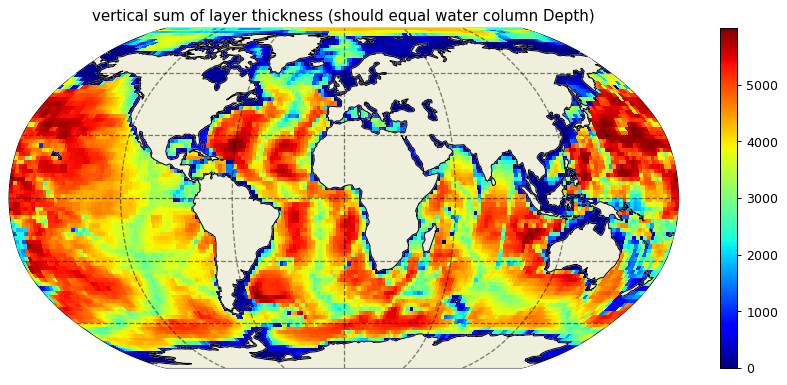

In [15]:
plt.figure(figsize=(12,5), dpi= 90)
ecco.plot_proj_to_latlon_grid(ecco_monthly_ds.XC, ecco_monthly_ds.YC, np.sum(ecco_grid.hFacC*ecco_grid.drF, axis=0), \
                              user_lon_0=0,plot_type='pcolormesh',show_colorbar=True,dx=2,dy=2,cmap='jet');
plt.title('vertical sum of layer thickness (should equal water column Depth)');

In [48]:
np.shape(ecco_grid.hFacC)

(50, 13, 90, 90)

In [50]:
rho0 = 1035
g = 9.81
# rho_pr_jmd_old = integrate.cumulative_trapezoid(rho_jmd95-rho0,x=np.tile(z, (np.shape(salt)[0],1,1,1,1)),axis=1)
rho_pr_jmd = np.nan*np.ones((np.shape(rho_jmd95)[0],np.shape(rho_jmd95)[2],np.shape(rho_jmd95)[3],np.shape(rho_jmd95)[4]))
rho_int_jmd = np.nan*np.ones((np.shape(rho_jmd95)[0],np.shape(rho_jmd95)[2],np.shape(rho_jmd95)[3],np.shape(rho_jmd95)[4]))
for i in range(np.shape(rho_jmd95)[0]):
    rho_pr_jmd[i] = np.sum((rho_jmd95[i]-rho0)*ecco_grid.hFacC*ecco_grid.drF, axis=0)
    rho_int_jmd[i] = np.sum((rho_jmd95[i])*ecco_grid.hFacC*ecco_grid.drF, axis=0)
steric_height_jmd = (-1/rho0)*rho_pr_jmd
steric_height_p_jmd = (-1*g)*rho_int_jmd

In [25]:
density_jmd_xr = xr.DataArray(
    data=rho_jmd95,
    dims=["time","layer","tile","j", "i"],
    coords=dict(
        i=(["i"], ecco_monthly_ds.SALT.i.data), j=(["j"], ecco_monthly_ds.SALT.j.data),
        XC=(["tile","j","i"], ecco_monthly_ds.SALT.XC.data), YC=(["tile","j","i"], ecco_monthly_ds.SALT.YC.data),
        tile=(["tile"], ecco_monthly_ds.SALT.tile.data), time=(["time"], ecco_monthly_ds.SALT.time.data), 
        layer=(["layer"], np.arange(np.shape(ecco_grid.drF)[0]))
    ),
)
steric_height_jmd_xr = xr.DataArray(
    data=steric_height_jmd,
    dims=["time","tile","j", "i"],
    coords=dict(
        i=(["i"], ecco_monthly_ds.SALT.i.data), j=(["j"], ecco_monthly_ds.SALT.j.data),
        XC=(["tile","j","i"], ecco_monthly_ds.SALT.XC.data), YC=(["tile","j","i"], ecco_monthly_ds.SALT.YC.data),
        tile=(["tile"], ecco_monthly_ds.SALT.tile.data), time=(["time"], ecco_monthly_ds.SALT.time.data),
    ),
)

In [52]:
# save file 
# -------------------------------
filename = ('/Users/jakesteinberg/Documents/NASA_OSTST/rho_steric_2011_2017.nc')
ds = xr.Dataset(
    data_vars=dict(
        rho=(["time","layer","tile","j", "i"], rho_jmd95),
        steric=(["time","tile","j", "i"], steric_height_jmd),
        steric_p=(["time","tile","j", "i"], steric_height_p_jmd),
    ),
    coords=dict(
        i=(["i"], ecco_monthly_ds.SALT.i.data), 
        j=(["j"], ecco_monthly_ds.SALT.j.data),
        XC=(["tile","j","i"], ecco_monthly_ds.SALT.XC.data), 
        YC=(["tile","j","i"], ecco_monthly_ds.SALT.YC.data),
        tile=(["tile"], ecco_monthly_ds.SALT.tile.data), 
        time=(["time"], ecco_monthly_ds.SALT.time.data), 
        layer=(["layer"], np.arange(np.shape(ecco_grid.drF)[0])),
        drF=(["layer"], ecco_grid.drF.data),
        hFacC=(["layer","tile","j","i"], ecco_grid.hFacC.data),
    ),
)
ds.to_netcdf(path=filename)

In [37]:
# upper 1000m
rho_pr_jmd_1000 = np.nan*np.ones((np.shape(rho_jmd95)[0],np.shape(rho_jmd95)[2],np.shape(rho_jmd95)[3],np.shape(rho_jmd95)[4]))
for i in range(np.shape(rho_jmd95)[0]):
    rho_pr_jmd_1000[i] = np.sum((rho_jmd95[i][0:29]-rho0)*ecco_grid.hFacC[0:29]*ecco_grid.drF[0:29], axis=0)
steric_height_jmd_1000 = (-1/rho0)*rho_pr_jmd_1000
# deeper 
rho_pr_jmd_deep = np.nan*np.ones((np.shape(rho_jmd95)[0],np.shape(rho_jmd95)[2],np.shape(rho_jmd95)[3],np.shape(rho_jmd95)[4]))
for i in range(np.shape(rho_jmd95)[0]):
    rho_pr_jmd_deep[i] = np.sum((rho_jmd95[i][29:]-rho0)*ecco_grid.hFacC[29:]*ecco_grid.drF[29:], axis=0)
steric_height_jmd_deep = (-1/rho0)*rho_pr_jmd_deep

steric_height_jmd_1000_xr = xr.DataArray(
    data=steric_height_jmd_1000,
    dims=["time","tile","j", "i"],
    coords=dict(
        i=(["i"], ecco_monthly_ds.SALT.i.data), j=(["j"], ecco_monthly_ds.SALT.j.data),
        XC=(["tile","j","i"], ecco_monthly_ds.SALT.XC.data), YC=(["tile","j","i"], ecco_monthly_ds.SALT.YC.data),
        tile=(["tile"], ecco_monthly_ds.SALT.tile.data), time=(["time"], ecco_monthly_ds.SALT.time.data),
    ),
)
steric_height_jmd_deep_xr = xr.DataArray(
    data=steric_height_jmd_deep,
    dims=["time","tile","j", "i"],
    coords=dict(
        i=(["i"], ecco_monthly_ds.SALT.i.data), j=(["j"], ecco_monthly_ds.SALT.j.data),
        XC=(["tile","j","i"], ecco_monthly_ds.SALT.XC.data), YC=(["tile","j","i"], ecco_monthly_ds.SALT.YC.data),
        tile=(["tile"], ecco_monthly_ds.SALT.tile.data), time=(["time"], ecco_monthly_ds.SALT.time.data),
    ),
)

In [78]:
np.shape(SSHDYN_global_mean_mon)

(72,)

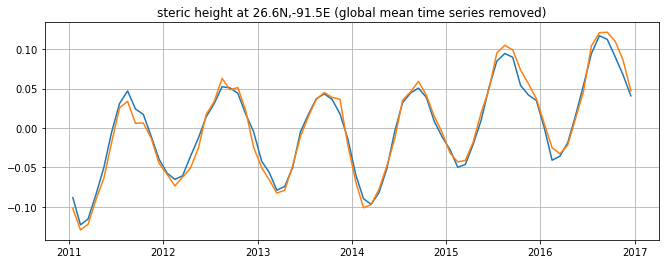

In [80]:
test_lon = -91.5
test_lat = 26.578028
testloc = np.where((ecco_monthly_ds.YC.isel(tile=10) > (test_lat-0.75)) & (ecco_monthly_ds.YC.isel(tile=10) < (test_lat+0.75)) & \
                   (ecco_monthly_ds.XC.isel(tile=10) > (test_lon-0.75)) & (ecco_monthly_ds.XC.isel(tile=10) < (test_lon+0.75)))
months = ecco_monthly_ds.time
total_ocean_area = np.sum(ecco_monthly_ds.rA*ocean_mask)
steric_height_global_mean = (steric_height_jmd_xr*ecco_monthly_ds.rA).sum(dim=['i','j','tile'])/total_ocean_area
steric_height_r = steric_height_jmd_xr - steric_height_jmd_xr.mean(dim='time') # - steric_height_global_mean

SSHDYN_global_mean_mon = (ecco_monthly_ds.SSHDYN*ecco_monthly_ds.rA).sum(dim=['i','j','tile'])/total_ocean_area
SSHDYN_minus_global_mean = ecco_monthly_ds.SSHDYN - ecco_monthly_ds.SSHDYN.mean(dim='time') # SSHDYN_global_mean_mon

f, ax = plt.subplots(1,1,figsize=(11,4))
ax.plot(months, steric_height_r[:,10,testloc[0][0],testloc[1][0]])
ax.plot(months, SSHDYN_minus_global_mean[:,10,testloc[0][0],testloc[1][0]])
ax.set_title('steric height at ' + str(np.round(ecco_monthly_ds.YC.isel(tile=10)[testloc[0][0],testloc[1][0]].data,1)) + 'N,' + \
             str(np.round(ecco_monthly_ds.XC.isel(tile=10)[testloc[0][0],testloc[1][0]].data,1)) + 'E (global mean time series removed)') 
ax.grid()

In [38]:
# STERIC HEIGHT TREND
days_since_first_record = ((ecco_monthly_ds.time - ecco_monthly_ds.time[0])/(86400e9)).astype(int).values

sh_flat = np.reshape(steric_height_r.values, (len(steric_height_r.time), 13*90*90))
sh_flat[np.nonzero(np.isnan(sh_flat))] = 0
# slope is in m / day
sh_slope, sh_intercept = np.polyfit(days_since_first_record, sh_flat, 1)
# and reshape the slope result back to 13x90x90    
sh_slope_all = np.reshape(sh_slope, (13,90,90))

# upper 1000
steric_height_1000_global_mean = (steric_height_jmd_1000_xr*ecco_monthly_ds.rA).sum(dim=['i','j','tile'])/total_ocean_area
steric_height_r_1000 = steric_height_jmd_1000_xr - steric_height_1000_global_mean
sh_flat = np.reshape(steric_height_r_1000.values, (len(steric_height_r.time), 13*90*90))
sh_flat[np.nonzero(np.isnan(sh_flat))] = 0
sh_slope, sh_intercept = np.polyfit(days_since_first_record, sh_flat, 1)  
sh_slope_1000 = np.reshape(sh_slope, (13,90,90))
# deep
steric_height_deep_global_mean = (steric_height_jmd_deep_xr*ecco_monthly_ds.rA).sum(dim=['i','j','tile'])/total_ocean_area
steric_height_r_deep = steric_height_jmd_deep_xr - steric_height_deep_global_mean
sh_flat = np.reshape(steric_height_r_deep.values, (len(steric_height_r.time), 13*90*90))
sh_flat[np.nonzero(np.isnan(sh_flat))] = 0
sh_slope, sh_intercept = np.polyfit(days_since_first_record, sh_flat, 1)  
sh_slope_deep = np.reshape(sh_slope, (13,90,90))

sh_trend = xr.DataArray(
    data=sh_slope_all,
    dims=["tile","j", "i"],
    coords=dict(
        i=(["i"], np.arange(90)), j=(["j"], np.arange(90)),
        XC=(["tile","j","i"], steric_height_r.XC.data), YC=(["tile","j","i"], steric_height_r.YC.data),
        tile=(["tile"], np.arange(13)),
    ),
)
sh_1000_trend = xr.DataArray(
    data=sh_slope_1000,
    dims=["tile","j", "i"],
    coords=dict(
        i=(["i"], np.arange(90)), j=(["j"], np.arange(90)),
        XC=(["tile","j","i"], steric_height_r.XC.data), YC=(["tile","j","i"], steric_height_r.YC.data),
        tile=(["tile"], np.arange(13)),
    ),
)
sh_deep_trend = xr.DataArray(
    data=sh_slope_deep,
    dims=["tile","j", "i"],
    coords=dict(
        i=(["i"], np.arange(90)), j=(["j"], np.arange(90)),
        XC=(["tile","j","i"], steric_height_r.XC.data), YC=(["tile","j","i"], steric_height_r.YC.data),
        tile=(["tile"], np.arange(13)),
    ),
)

In [21]:
# rho_pr_ind = np.nan*np.ones(np.shape(rho_jmd95[:,0]))
# for m in range(np.shape(rho_jmd95)[0]):
#     print(m)
#     for k in range(np.shape(rho_jmd95)[2]):
#         for j in range(np.shape(rho_jmd95)[3]):
#             for i in range(np.shape(rho_jmd95)[4]):
#                 if ~np.isnan(ocean_mask[0,k,j,i]):
#                     this_rho_pr = rho_jmd95[m,:,k,j,i]-rho0
#                     good = np.where(~np.isnan(this_rho_pr))[0]
#                     rho_pr_ind[m,k,j,i] = integrate.cumulative_trapezoid(this_rho_pr[good], x=z[good,k,j,i].data)[-1]

In [11]:
# p_test = gsw.p_from_z(ecco_monthly_ds.Z, ecco_monthly_ds.YC)
# z_test = gsw.z_from_p(p_test, ecco_monthly_ds.YC)
# z_test = z_test.transpose('time','k','tile','j','i')
# this_salt_test = ecco_monthly_ds.SALT
# this_salt_test = this_salt_test.where(this_salt_test>0, np.nan)
# this_sa_test = gsw.SA_from_SP(this_salt_test, p_test, ecco_monthly_ds.XC, ecco_monthly_ds.YC)
# this_ct_test = gsw.CT_from_pt(this_sa_test, ecco_monthly_ds.THETA)
# rho_test = gsw.rho(this_sa_test, this_ct_test, p_test)
# rho0 = 1035
# rho_prime_int = integrate.cumtrapz(rho_test-rho0,z_test,axis=1)
# steric_height = (-1/rho0)*((np.tile(H, (np.shape(z_test)[0],1,1,1))+\
#                             ecco_monthly_ds.SSH)/np.tile(H, (np.shape(z_test)[0],1,1,1)))*rho_prime_int[:,0]

-179.5 179.5
-180.0 180.0
-89.5 89.5
-90.0 90.0


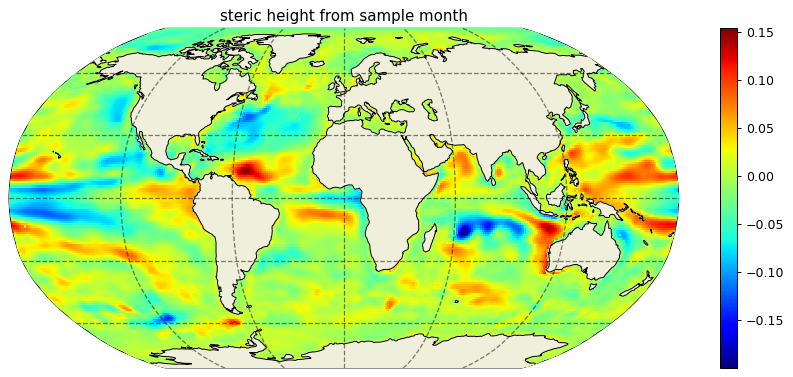

In [39]:
# steric height from one month - local time mean
to_plot = steric_height_jmd_xr[5] - steric_height_jmd_xr.mean(dim='time') 
# steric height from one month with global mean removed - local time mean 
# to_plot = steric_height_r = steric_height_r[5] - steric_height_jmd_xr.mean(dim='time')
plt.figure(figsize=(12,5), dpi= 90)
ecco.plot_proj_to_latlon_grid(ecco_monthly_ds.XC, ecco_monthly_ds.YC, to_plot, \
                              user_lon_0=0,plot_type='pcolormesh',show_colorbar=True,dx=1,dy=1,cmap='jet');
plt.title('steric height from sample month');

0.5028032681564246 179.49720673184356
1e-05 180.0
-89.5 89.5
-90.0 90.0
-179.49720673184356 -0.5028032681564254
-180.0 -1e-05
-89.5 89.5
-90.0 90.0
0.5028032681564246 179.49720673184356
1e-05 180.0
-89.5 89.5
-90.0 90.0
-179.49720673184356 -0.5028032681564254
-180.0 -1e-05
-89.5 89.5
-90.0 90.0
0.5028032681564246 179.49720673184356
1e-05 180.0
-89.5 89.5
-90.0 90.0
-179.49720673184356 -0.5028032681564254
-180.0 -1e-05
-89.5 89.5
-90.0 90.0


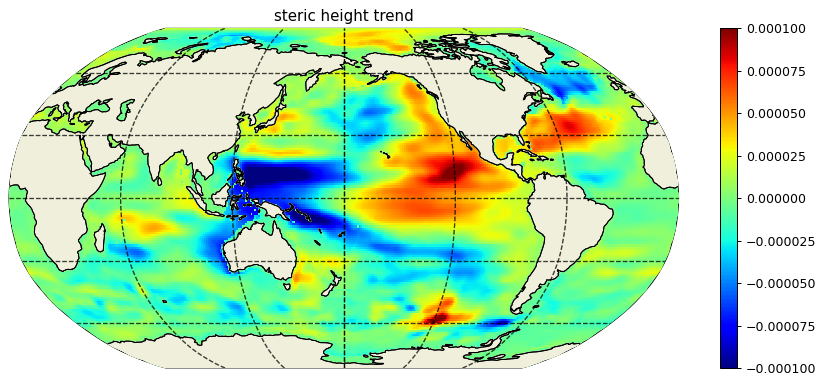

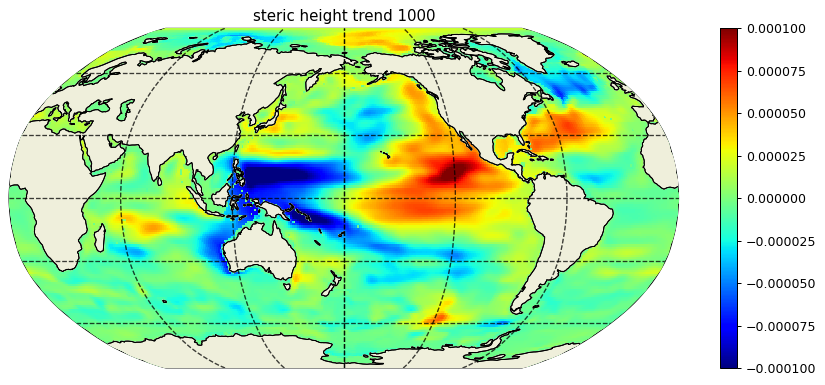

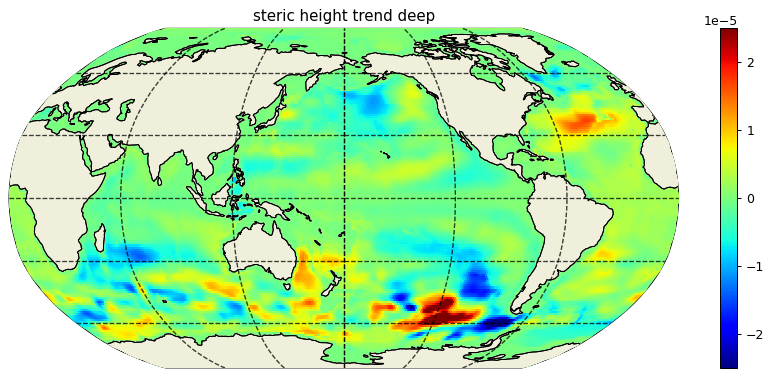

In [40]:
plt.figure(figsize=(12,5), dpi= 90)
ecco.plot_proj_to_latlon_grid(ecco_monthly_ds.XC, ecco_monthly_ds.YC, sh_trend, \
                              user_lon_0=180,plot_type='pcolormesh',show_colorbar=True,dx=1,dy=1,cmap='jet',cmin=-0.0001,cmax=0.0001);
plt.title('steric height trend');
plt.figure(figsize=(12,5), dpi= 90)
ecco.plot_proj_to_latlon_grid(ecco_monthly_ds.XC, ecco_monthly_ds.YC, sh_1000_trend, \
                              user_lon_0=180,plot_type='pcolormesh',show_colorbar=True,dx=1,dy=1,cmap='jet',cmin=-0.0001,cmax=0.0001);
plt.title('steric height trend 1000');
plt.figure(figsize=(12,5), dpi= 90)
ecco.plot_proj_to_latlon_grid(ecco_monthly_ds.XC, ecco_monthly_ds.YC, sh_deep_trend, \
                              user_lon_0=180,plot_type='pcolormesh',show_colorbar=True,dx=1,dy=1,cmap='jet',cmin=-0.000025,cmax=0.000025);
plt.title('steric height trend deep');

In [81]:
total_ocean_area = np.sum(ecco_monthly_ds.rA*ocean_mask[0,:])
steric_height_anom = steric_height_jmd_xr # - steric_height_jmd_xr.mean(dim=['tile','j','i'])
SH_global_mean_mon = (steric_height_anom*ecco_monthly_ds.rA).sum(dim=['i','j','tile'])/total_ocean_area
SH_global_mean_mon = SH_global_mean_mon # - SH_global_mean_mon.mean(dim='time')

In [82]:
SSHDYN_global_mean_mon = (ecco_monthly_ds.SSHDYN*ecco_monthly_ds.rA).sum(dim=['i','j','tile'])/total_ocean_area
SSHDYN_global_mean_mon = SSHDYN_global_mean_mon - SSHDYN_global_mean_mon.mean(dim=['time'])
OBP_global_mean_mon = ((ecco_monthly_ds.OBPNOPAB)*ecco_monthly_ds.rA).sum(dim=['i','j','tile'])/total_ocean_area
OBP_global_mean_mon = OBP_global_mean_mon - OBP_global_mean_mon.mean(dim=['time'])

# obp = ecco_monthly_ds.OBPNOPAB - ecco_monthly_ds.OBPNOPAB.mean(dim=['i','j','tile'])
# obp_global_mean = (obp*ecco_monthly_ds.rA).sum(dim=['i','j','tile'])/total_ocean_area

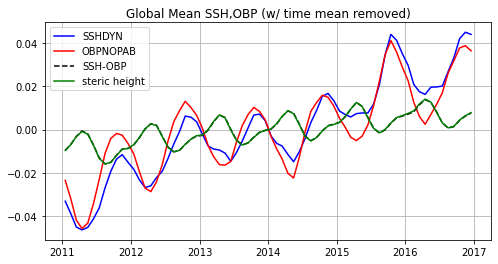

In [83]:
# SSHDYN_global_mean_mon.plot(color='r');
# OBP_global_mean_mon.plot(color='b');
f, (ax1) = plt.subplots(1,1,figsize=(8,4))
steric_height_check =  SSHDYN_global_mean_mon - OBP_global_mean_mon
ax1.plot(steric_height_check.time, SSHDYN_global_mean_mon, color='b', label='SSHDYN');
ax1.plot(steric_height_check.time, OBP_global_mean_mon, color='r', label='OBPNOPAB');
ax1.plot(steric_height_check.time, 1*steric_height_check, color='k', label='SSH-OBP', linestyle='--');
ax1.plot(steric_height_check.time, SH_global_mean_mon - SH_global_mean_mon.mean(dim='time'), color='g', label='steric height');
ax1.set_title('Global Mean SSH,OBP (w/ time mean removed)'); ax1.legend(); ax1.grid()

In [44]:
metrics = {
    ('X',): ['dxC', 'dxG'], # X distances
    ('Y',): ['dyC', 'dyG'], # Y distances
    ('X', 'Y'): ['rA', 'rAz', 'rAs', 'rAw'] # Areas
}
grid = Grid(ecco_monthly_ds, metrics=metrics)

In [45]:
# H_l = grid.interp(ecco_monthly_ds.Depth,'X')
# test = (grid.diff(H_l, 'X' ))/ecco_monthly_ds.dxC
testx = grid.derivative(ecco_monthly_ds.Depth,'X')
testy = grid.derivative(ecco_monthly_ds.Depth,'Y')

H_x = grid.interp(testx,'X')
H_y = grid.interp(testy,'Y')

In [47]:
grid

<xgcm.Grid>
T Axis (periodic, boundary=None):
  * center   time
Z Axis (periodic, boundary=None):
  * center   k --> left
  * outer    k_p1 --> center
  * right    k_u --> center
  * left     k_l --> center
X Axis (periodic, boundary=None):
  * center   i --> left
  * left     i_g --> center
Y Axis (periodic, boundary=None):
  * center   j --> left
  * left     j_g --> center

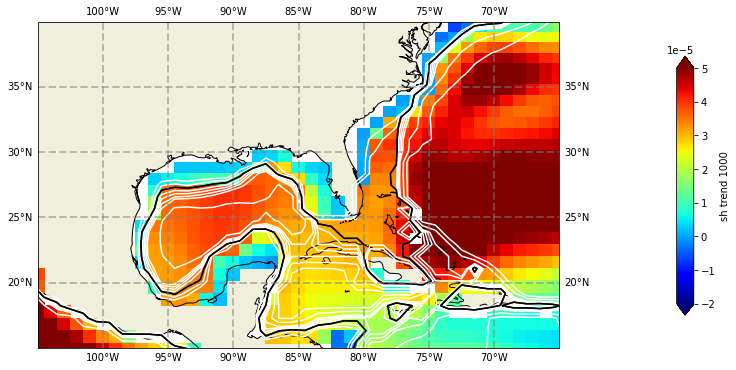

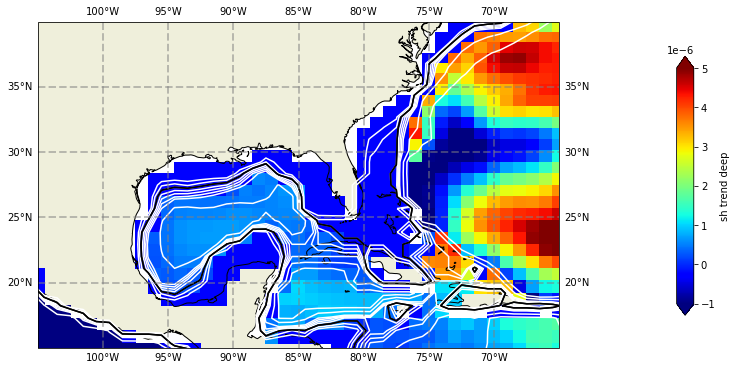

In [138]:
tile_num=10
# pull out lats and lons
lons = np.copy(ecco_monthly_ds.XC.sel(tile=tile_num))
lats = ecco_monthly_ds.YC.isel(tile=tile_num)
tile_to_plot = sh_1000_trend.isel(tile=tile_num) # steric height trend
Dep_tile_to_plot = ecco_monthly_ds.Depth.isel(tile=tile_num)
tile_to_plot= tile_to_plot.where(ecco_monthly_ds.hFacC.isel(tile=tile_num,k=0) !=0, np.nan)

f, ax = plt.subplots(1,1,figsize=(12,6), subplot_kw={'projection':ccrs.PlateCarree(central_longitude=0)})
oo = ax.pcolor(lons, lats, tile_to_plot, vmin=-0.00002, vmax=0.00005, transform=ccrs.PlateCarree(), cmap='jet') # vmin=-0.0001, vmax=0.0001,
ax.contour(lons, lats, Dep_tile_to_plot, levels=[500, 750, 1000, 1250, 1500, 1750, 2000, 3000, 4000], colors='w')
ax.contour(lons, lats, Dep_tile_to_plot, levels=[1000, 1001], colors='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--');
ax.coastlines();ax.add_feature(cfeature.LAND);
cax = f.add_axes([0.95, 0.2, 0.02, 0.6])
ax.set_xlim([-105, -65]); ax.set_ylim([15, 40]);
f.colorbar(oo, cax=cax, orientation='vertical', extend='both', label='sh trend 1000')

tile_to_plot = sh_deep_trend.isel(tile=tile_num) # steric height trend
Dep_tile_to_plot = ecco_monthly_ds.Depth.isel(tile=tile_num)
tile_to_plot= tile_to_plot.where(ecco_monthly_ds.hFacC.isel(tile=tile_num,k=0) !=0, np.nan)
f, ax = plt.subplots(1,1,figsize=(12,6), subplot_kw={'projection':ccrs.PlateCarree(central_longitude=0)})
oo = ax.pcolor(lons, lats, tile_to_plot, vmin=-0.000001, vmax=0.000005, transform=ccrs.PlateCarree(), cmap='jet') # vmin=-0.0001, vmax=0.0001,
ax.contour(lons, lats, Dep_tile_to_plot, levels=[500, 750, 1000, 1250, 1500, 1750, 2000, 3000, 4000], colors='w')
ax.contour(lons, lats, Dep_tile_to_plot, levels=[1000, 1001], colors='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--');
ax.coastlines();ax.add_feature(cfeature.LAND);
cax = f.add_axes([0.95, 0.2, 0.02, 0.6])
ax.set_xlim([-105, -65]); ax.set_ylim([15, 40]);
f.colorbar(oo, cax=cax, orientation='vertical', extend='both', label='sh trend deep')

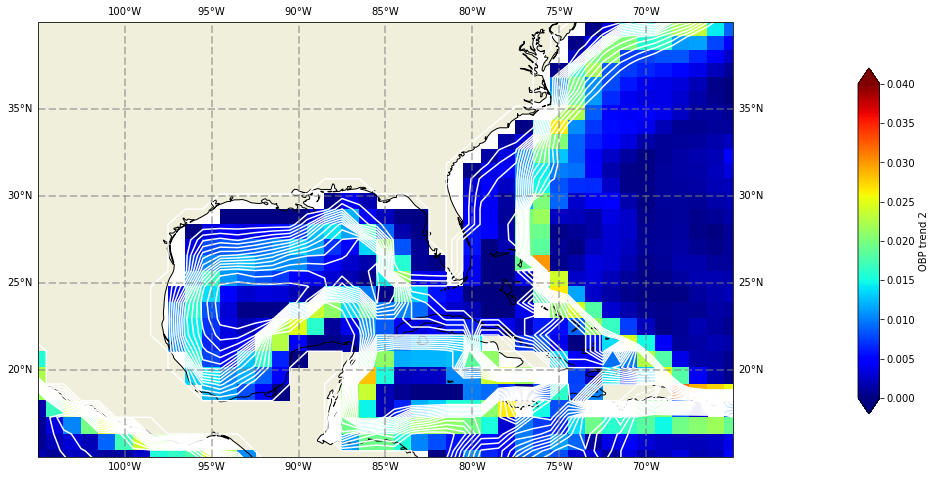

In [140]:
tile_num=10
# pull out lats and lons
lons = np.copy(ecco_monthly_ds.XC.sel(tile=tile_num))
lats = ecco_monthly_ds.YC.isel(tile=tile_num)

gradH_np = np.sqrt(H_x.isel(tile=tile_num).data**2 + H_y.isel(tile=tile_num).data**2)
gradH = xr.DataArray(
    data=gradH_np,
    dims=["j", "i"],
    coords=dict(
        i=(["i"], np.arange(90)), j=(["j"], np.arange(90)),
    ),
)

# tile_to_plot = sh_1000_trend.isel(tile=tile_num) # steric height trend
tile_to_plot = gradH
Dep_tile_to_plot = ecco_monthly_ds.Depth.isel(tile=tile_num)
tile_to_plot= tile_to_plot.where(ecco_monthly_ds.hFacC.isel(tile=tile_num,k=0) !=0, np.nan)

f, ax = plt.subplots(1,1,figsize=(15,8), subplot_kw={'projection':ccrs.PlateCarree(central_longitude=0)})
oo = ax.pcolor(lons, lats, tile_to_plot, vmin=0, vmax=0.04, transform=ccrs.PlateCarree(), cmap='jet') # vmin=-0.0001, vmax=0.0001,
# ax.quiver(lons,lats,H_x.isel(tile=tile_num),H_y.isel(tile=tile_num),transform=ccrs.PlateCarree())
ax.contour(lons, lats, Dep_tile_to_plot, levels=np.arange(0,4000,250), colors='w')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--');
ax.coastlines();ax.add_feature(cfeature.LAND);
cax = f.add_axes([0.95, 0.2, 0.02, 0.6])
ax.set_xlim([-105, -65]); ax.set_ylim([15, 40]);
f.colorbar(oo, cax=cax, orientation='vertical', extend='both', label='OBP trend 2')